<a href="https://colab.research.google.com/github/olivia-sp/h2-station-dev/blob/main/station_model_total_v0_2_olivia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ver0.1 - EDA
#ver0.2 - EDA 업데이트 및 모델 개선


# EDA

In [ ]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [ ]:
import os

if os.path.isfile('/content/content/drive/MyDrive/Colab Notebooks/data_set/result-congress-26-tune1.csv') == True:
  print('already')
else:
  #os.mkdir('data_set')
  %cd data_set
  !wget https://raw.githubusercontent.com/olivia-sp/h2-station-dev/main/data_set/result-congress-26-tune1.csv

% cd /content


[Errno 2] No such file or directory: 'data_set'
/content
--2022-02-10 02:03:20--  https://raw.githubusercontent.com/olivia-sp/h2-station-dev/main/data_set/result-congress-26-tune1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2022-02-10 02:03:20 ERROR 404: Not Found.

/content


In [ ]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
#DATA_PATH = os.path.join(CURR_PATH,'data_set')
RAW_PATH = CURR_PATH + '/drive/MyDrive/Colab Notebooks/data_set/result-congress-26-tune1.csv'



In [ ]:
df_raw_data = pd.read_csv(RAW_PATH, index_col=0)
df_raw_data.info()

df_raw_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77436
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  bool   
 1   weekend             77222 non-null  bool   
 2   time                77222 non-null  object 
 3   precipitation_type  46123 non-null  float64
 4   temperature         46123 non-null  float64
 5   station_name        77222 non-null  int64  
 6   filename            77222 non-null  object 
 7   precipitation       46123 non-null  float64
 8   total_car_num       77222 non-null  int64  
 9   day_week            77222 non-null  object 
 10  decision_car_num    76980 non-null  object 
 11  humid               46123 non-null  float64
 12  max_car_num         76907 non-null  float64
 13  year                77222 non-null  int64  
 14  month               77222 non-null  int64  
 15  day                 77222 non-null  int64  
 16  hour

holiday                   0
weekend                   0
time                      0
precipitation_type    31099
temperature           31099
station_name              0
filename                  0
precipitation         31099
total_car_num             0
day_week                  0
decision_car_num        242
humid                 31099
max_car_num             315
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64

In [ ]:
df_raw_data = df_raw_data.reset_index()

In [ ]:
df_raw_data2=df_raw_data.drop(['decision_car_num', 'max_car_num', 'filename', 'index'], axis=1)
df_raw_data2.isnull().sum()

holiday                   0
weekend                   0
time                      0
precipitation_type    31099
temperature           31099
station_name              0
precipitation         31099
total_car_num             0
day_week                  0
humid                 31099
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
dtype: int64

In [ ]:
df_raw_data2

,holiday,weekend,time,precipitation_type,temperature,station_name,precipitation,total_car_num,day_week,humid,year,month,day,hour,minute,second
0,False,False,2020-09-17-21h-20m-28s,0.0,23.0,26,0.0,2,thu,52.0,2020,9,17,21,20,28
1,False,False,2020-09-17-21h-38m-08s,0.0,23.0,26,0.0,3,thu,52.0,2020,9,17,21,38,8
2,False,False,2020-09-18-16h-45m-41s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,45,41
3,False,False,2020-09-18-16h-50m-00s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,50,0
4,False,False,2020-09-18-16h-55m-00s,0.0,25.3,26,0.0,4,fri,38.0,2020,9,18,16,55,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,False,False,2022-01-06-16h-40m-00s,NaN,NaN,26,NaN,3,thu,NaN,2022,1,6,16,40,0
77218,False,False,2022-01-06-16h-45m-00s,NaN,NaN,26,NaN,3,thu,NaN,2022,1,6,16,45,0
77219,False,False,2022-01-06-16h-50m-00s,NaN,NaN,26,NaN,4,thu,NaN,2022,1,6,16,50,0
77220,False,False,2022-01-06-16h-55m-00s,NaN,NaN,26,NaN,2,thu,NaN,2022,1,6,16,55,0


Holiday 처리

In [ ]:
!pip install holidays

In [ ]:
# Holiday Data 추가   
import holidays

time_df = pd.DataFrame(df_raw_data2['time'])
time_df['time'] = pd.to_datetime(time_df['time'], format='%Y-%m-%d-%Hh-%Mm-%Ss', errors='raise')
time_df['date'] = time_df['time'].dt.date

holiday_list = time_df['date']


Year 끝 두자리로 변환

In [ ]:
#Year 끝 2자리 사용
time_df['year'] = time_df['time'].dt.strftime("%y")
time_df['year']
# time_df['year'] = time_df['time2'].dt.year

0        20
1        20
2        20
3        20
4        20
         ..
77217    22
77218    22
77219    22
77220    22
77221    22
Name: year, Length: 77222, dtype: object

In [ ]:
# 한국 휴일 개체 생성
kr_holidays = holidays.KR()

# generate holiday table 
holiday_df = pd.DataFrame(columns=['ds', 'imp_holiday'])
holiday_df['ds'] = holiday_list
holiday_df['imp_holiday'] = holiday_df.ds.apply(lambda x: 'True' if x in kr_holidays else 'False')

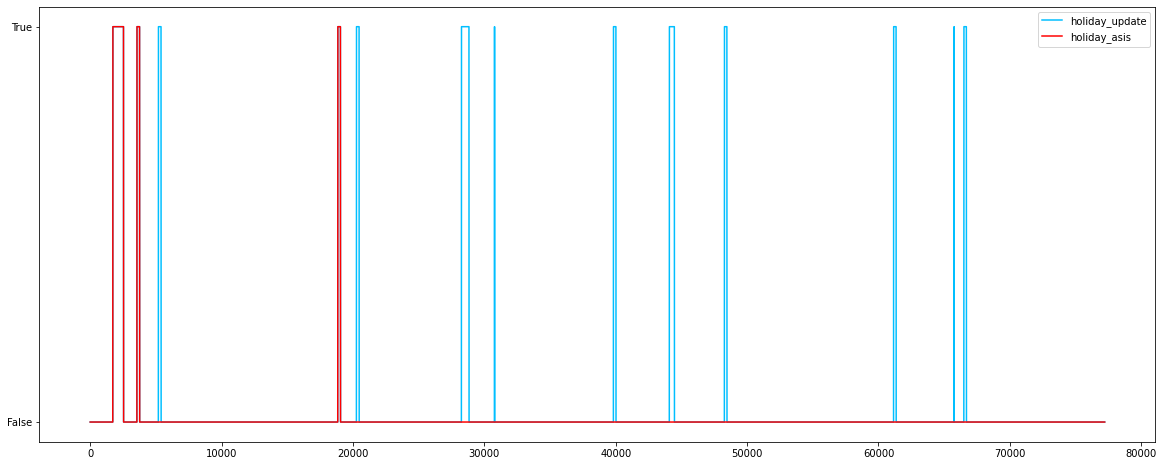

In [ ]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)


chart.plot(holiday_df['imp_holiday'], color='deepskyblue' , label='holiday_update')
chart.plot(df_raw_data2['holiday'], color='red' , label='holiday_asis')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'best')

In [ ]:
df_raw_data2['year'] = time_df['year'].astype(int)
df_raw_data2['holiday'] = holiday_df['imp_holiday']

Season 데이터 생성

In [ ]:
def SeasonData(month):
    if month in [12,1,2]:
        return 'winter'
    elif month in [3,4,5]:
        return 'spring'
    elif month in [6,7,8]:
        return 'summer'
    elif month in [9,10,11]:
        return 'autumn'

df_raw_data2['season'] = df_raw_data2.month.apply(SeasonData)

Hour_group 데이터 생성
- Dawn 0시~7시
- Morning 7시~12시
- Lunch 12시~13시
- Day 13시~18시
- Dinner 18시~19시
- Night 19시~0시

In [ ]:
def HourGroupData(hour):
    if hour in [1,2,3,4,5,6]:
        return 'dawn'
    elif hour in [7,8,9,10,11]:
        return 'morning'
    elif hour in [12]:
        return 'lunch'
    elif hour in [13,14,15,16,17]:
        return 'afternoon'
    elif hour in [18]:
      return 'dinner'
    elif hour in [19, 20, 21, 22, 23, 0]:
      return 'night'

df_raw_data2['hour_group'] = df_raw_data2.hour.apply(HourGroupData)

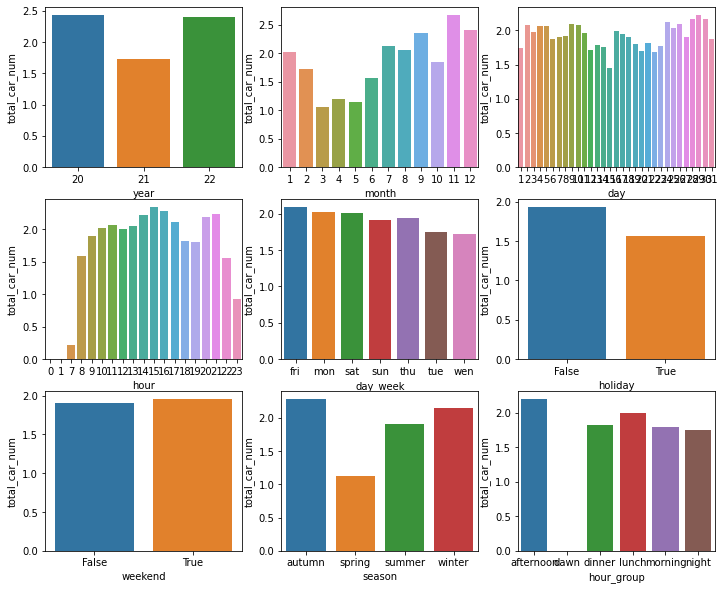

In [ ]:
#year와 count
fig = plt.figure(figsize=[12,10])
ax1 = fig.add_subplot(3,3,1)
ax1 = sns.barplot(x='year',y='total_car_num',data=df_raw_data2.groupby('year')['total_car_num'].mean().reset_index())

#month와 count
ax2 = fig.add_subplot(3,3,2)
ax2 = sns.barplot(x='month',y='total_car_num',data=df_raw_data2.groupby('month')['total_car_num'].mean().reset_index())

#day와 count
ax3 = fig.add_subplot(3,3,3)
ax3 = sns.barplot(x='day',y='total_car_num',data=df_raw_data2.groupby('day')['total_car_num'].mean().reset_index())

#hour와 count
ax4 = fig.add_subplot(3,3,4)
ax4 = sns.barplot(x='hour',y='total_car_num',data=df_raw_data2.groupby('hour')['total_car_num'].mean().reset_index())

#day_week과 count
ax5 = fig.add_subplot(3,3,5)
ax5 = sns.barplot(x='day_week',y='total_car_num',data=df_raw_data2.groupby('day_week')['total_car_num'].mean().reset_index())

#holiday와 count
ax6 = fig.add_subplot(3,3,6)
ax6 = sns.barplot(x='holiday',y='total_car_num',data=df_raw_data2.groupby('holiday')['total_car_num'].mean().reset_index())

#weekend와 count
ax7 = fig.add_subplot(3,3,7)
ax7 = sns.barplot(x='weekend',y='total_car_num',data=df_raw_data2.groupby('weekend')['total_car_num'].mean().reset_index())

#season과 count
ax8 = fig.add_subplot(3,3,8)
ax8 = sns.barplot(x='season',y='total_car_num',data=df_raw_data2.groupby('season')['total_car_num'].mean().reset_index())

#hour_group과 count
ax9 = fig.add_subplot(3,3,9)
ax9 = sns.barplot(x='hour_group',y='total_car_num',data=df_raw_data2.groupby('hour_group')['total_car_num'].mean().reset_index())

In [ ]:
# sns.pairplot(df_raw_data2, height=5);
# plt.show()

In [ ]:
# plt.figure(figsize=(15,15))
# sns.heatmap(data = df_raw_data2.corr(), annot=True, 
# fmt = '.2f', linewidths=.5, cmap='Blues')

In [ ]:
df_raw_data2.drop(df_raw_data.loc[df_raw_data['total_car_num'] == 6].index, inplace =True)
df_raw_data2.info()

df_raw_data2.drop('time', axis=1, inplace = True)
df_raw_data2.info()

# df_raw_data2['day_week'].replace('mon', 0, inplace = True)
# df_raw_data2['day_week'].replace('tue', 1, inplace = True)
# df_raw_data2['day_week'].replace('wen', 2, inplace = True)
# df_raw_data2['day_week'].replace('thu', 3, inplace = True)
# df_raw_data2['day_week'].replace('fri', 4, inplace = True)
# df_raw_data2['day_week'].replace('sat', 5, inplace = True)
# df_raw_data2['day_week'].replace('sun', 6, inplace = True)

df_raw_data2['holiday'] = df_raw_data['holiday'].astype(int)
df_raw_data2['weekend'] = df_raw_data['weekend'].astype(int)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77221
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  object 
 1   weekend             77222 non-null  bool   
 2   time                77222 non-null  object 
 3   precipitation_type  46123 non-null  float64
 4   temperature         46123 non-null  float64
 5   station_name        77222 non-null  int64  
 6   precipitation       46123 non-null  float64
 7   total_car_num       77222 non-null  int64  
 8   day_week            77222 non-null  object 
 9   humid               46123 non-null  float64
 10  year                77222 non-null  int64  
 11  month               77222 non-null  int64  
 12  day                 77222 non-null  int64  
 13  hour                77222 non-null  int64  
 14  minute              77222 non-null  int64  
 15  second              77222 non-null  int64  
 16  seas

In [ ]:
day_week_dum = pd.get_dummies(df_raw_data2['day_week'])
# df_raw_data3 + day_week_dum
df_dum1 = df_raw_data2.join(day_week_dum,how='left')

In [ ]:
season_dum = pd.get_dummies(df_dum1['season'])
# df_raw_data3 + day_week_dum
df_dum2 = df_dum1.join(season_dum,how='left')

In [ ]:
hrgroup_dum = pd.get_dummies(df_dum2['hour_group'])
# df_raw_data3 + day_week_dum
df_dum3 = df_dum2.join(hrgroup_dum,how='left')

In [ ]:
df_raw_data3=df_dum3.drop(['day_week', 'season', 'hour_group'], axis=1)
df_raw_data3

,holiday,weekend,precipitation_type,temperature,station_name,precipitation,total_car_num,humid,year,month,day,hour,minute,second,fri,mon,sat,sun,thu,tue,wen,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,0,0,0.0,23.0,26,0.0,2,52.0,20,9,17,21,20,28,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0.0,23.0,26,0.0,3,52.0,20,9,17,21,38,8,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,45,41,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,50,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,55,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,0,0,NaN,NaN,26,NaN,3,NaN,22,1,6,16,40,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77218,0,0,NaN,NaN,26,NaN,3,NaN,22,1,6,16,45,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77219,0,0,NaN,NaN,26,NaN,4,NaN,22,1,6,16,50,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77220,0,0,NaN,NaN,26,NaN,2,NaN,22,1,6,16,55,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


In [ ]:
#df_raw_data3.describe()

In [ ]:
df_raw_data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77222 entries, 0 to 77221
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   holiday             77222 non-null  int64  
 1   weekend             77222 non-null  int64  
 2   precipitation_type  46123 non-null  float64
 3   temperature         46123 non-null  float64
 4   station_name        77222 non-null  int64  
 5   precipitation       46123 non-null  float64
 6   total_car_num       77222 non-null  int64  
 7   humid               46123 non-null  float64
 8   year                77222 non-null  int64  
 9   month               77222 non-null  int64  
 10  day                 77222 non-null  int64  
 11  hour                77222 non-null  int64  
 12  minute              77222 non-null  int64  
 13  second              77222 non-null  int64  
 14  fri                 77222 non-null  uint8  
 15  mon                 77222 non-null  uint8  
 16  sat 

결측값 처리

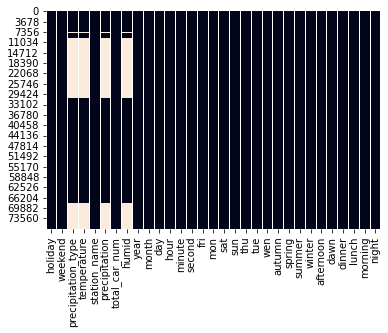

In [ ]:
%matplotlib inline
sns.heatmap(df_raw_data3.isnull(), cbar=False)

Data Imputation
1. mean/median : 작은 크기의 숫자형 데이터셋, 다른 feature 간 상관관계 고려 안 함, 범주형 feature 사용 불가, 부정확함
2. most frequent/zero/constant : 범주형 데이터셋, 다른 feature 간 상관관계 고려 안 함, 데이터 bias 생성 가능
3. KNN imputation : feature similarity  이용하여 근접한 데이터 찾음(impyute lib), 데이터셋에 따라 다르나 가장 정확함, 메모리 많이 필요, outlier에 민감
4. MICE : 누락된 데이터 여러번 채우는 방식, 연속형/이진형/범위형 패턴 처리 가능, imputation-analysis(m개의 완성된 데이터 분석)-pooling(평균,분산,신뢰구간 계산하여 합침)
5. 딥러닝 이용 : 범주형/non-numerical 데이터에 매우 효과적, DNN 이용해서 누락 값 유추, 한번에 한 컬럼만 대체 가능, 대규모 데이터셋은 속도가 상당히 느림, 유추할 feature에 대한 정보있는 feature 직접 지정해야 함
6. stochastic regression imputation : 동일 데이터셋의 다른 feature에서 결측값 예측
7. Extrapolation and Interpolation : 이산형 범위 내 데이터로부터 값 추정, interpolation(20살, 40살 데이터로 30살 추측), Extrapolation(1~20 데이터로 10년 후 예측, 안정성 떨어짐)
8. Hot-Deck Imputation : 비슷한 데이터셋에서 랜덤하게 선택


In [ ]:
df_null = df_raw_data3[['precipitation','precipitation_type', 'temperature', 'humid']]
df_raw_data4 = df_raw_data3.drop(['precipitation','precipitation_type', 'temperature', 'humid'], axis=1)
df_raw_data4

,holiday,weekend,station_name,total_car_num,year,month,day,hour,minute,second,fri,mon,sat,sun,thu,tue,wen,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,0,0,26,2,20,9,17,21,20,28,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,26,3,20,9,17,21,38,8,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,26,4,20,9,18,16,45,41,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,26,4,20,9,18,16,50,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,26,4,20,9,18,16,55,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,0,0,26,3,22,1,6,16,40,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77218,0,0,26,3,22,1,6,16,45,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77219,0,0,26,4,22,1,6,16,50,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77220,0,0,26,2,22,1,6,16,55,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


MICE

In [ ]:
!pip3 install impyute

In [ ]:
#다른 컬럼 상관관계 파악 필요
df_null_mice = df_raw_data3

In [ ]:
#df_null_mice.info()

In [ ]:
from impyute.imputation.cs import mice
imp_mice = mice(df_null_mice.values) # mice 학습시작
df_mice = pd.DataFrame(imp_mice, columns=df_null_mice.columns)

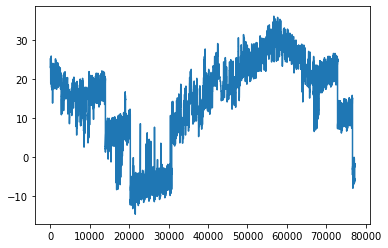

In [ ]:
df_mice['temperature'].plot()

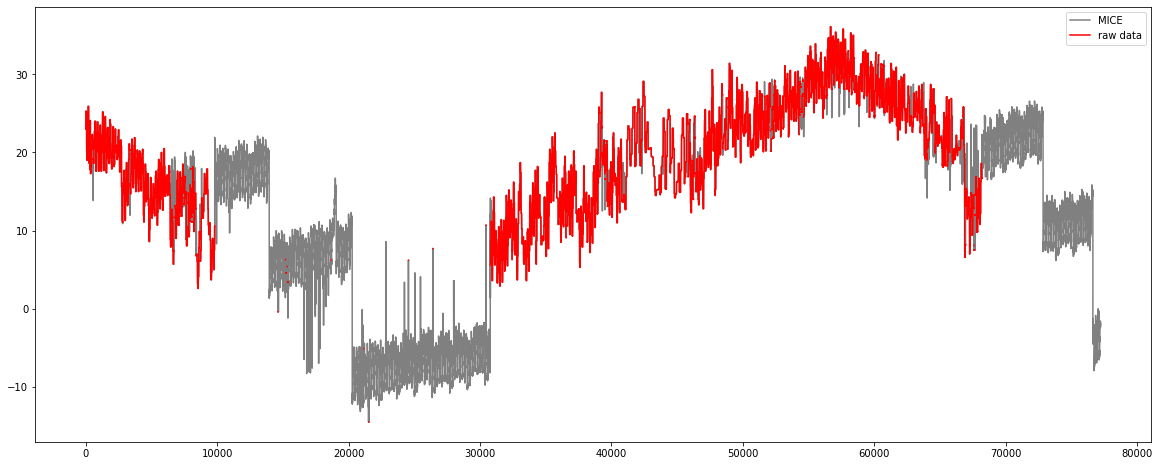

In [ ]:
# subplot 적용
fig = plt.figure(figsize = (20, 8))
chart = fig.add_subplot(1,1,1)

chart.plot(df_mice['temperature'], color='gray' , label='MICE')
chart.plot(df_raw_data3['temperature'], color='red' , label='raw data')
plt.legend(loc = 'best')

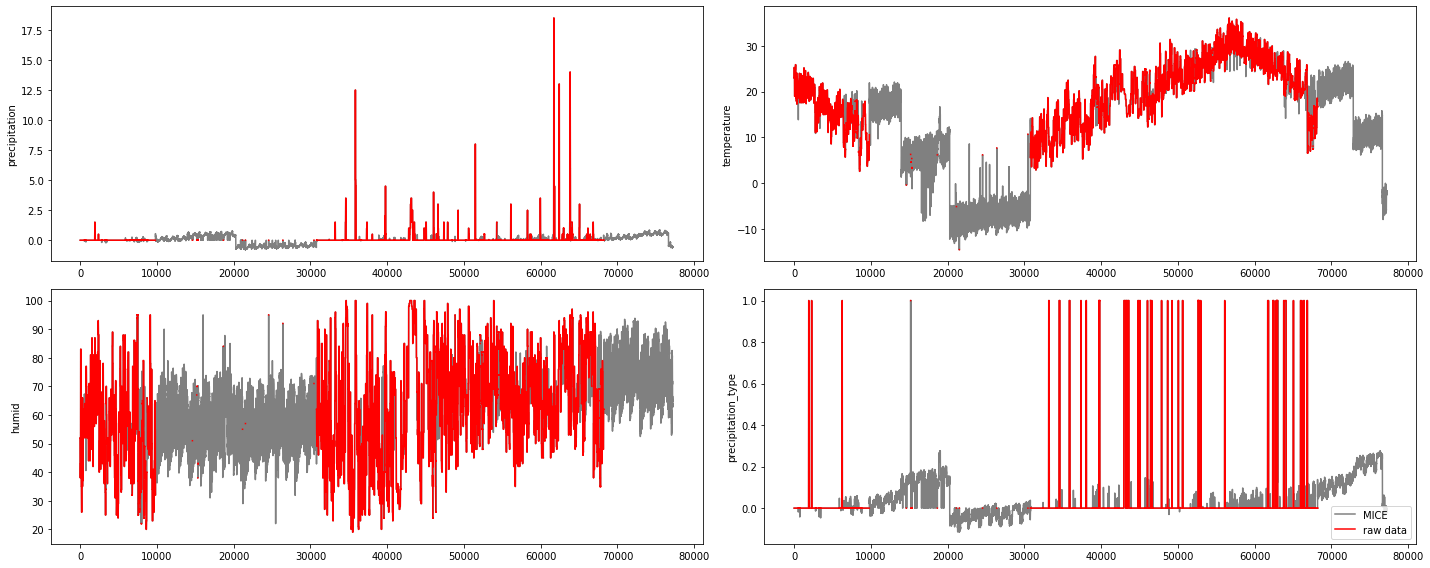

In [ ]:
# subplot 적용
plt.figure(figsize = (20, 8))

chart1 = plt.subplot(2,2,1)
plt.plot(df_mice['precipitation'], color='gray' , label='MICE')
plt.plot(df_raw_data2['precipitation'], color='red' , label='raw data')
plt.ylabel('precipitation')

chart2 = plt.subplot(2,2,2)
plt.plot(df_mice['temperature'], color='gray' , label='MICE')
plt.plot(df_raw_data2['temperature'], color='red' , label='raw data')
plt.ylabel('temperature')

chart3 = plt.subplot(2,2,3)
plt.plot(df_mice['humid'], color='gray' , label='MICE')
plt.plot(df_raw_data2['humid'], color='red' , label='raw data')
plt.ylabel('humid')

chart3 = plt.subplot(2,2,4)
plt.plot(df_mice['precipitation_type'], color='gray' , label='MICE')
plt.plot(df_raw_data2['precipitation_type'], color='red' , label='raw data')
plt.ylabel('precipitation_type')

#chart.plot(roll_mean20, color='pink' , label='')
plt.legend(loc = 'lower right')
plt.tight_layout()
plt.show()

In [ ]:
CURR_PATH = os.getcwd()

os.listdir(CURR_PATH)
#DATA_PATH = os.path.join(CURR_PATH,'data_set')
SAVE_PATH = CURR_PATH + '/drive/MyDrive/Colab Notebooks/data_set/data_imputation_MICE.csv'

In [ ]:
df_mice.to_csv(SAVE_PATH, index=False)

#성능평가 - MICE

모델 적용

In [ ]:
df_raw_data3

,holiday,weekend,precipitation_type,temperature,station_name,precipitation,total_car_num,humid,year,month,day,hour,minute,second,fri,mon,sat,sun,thu,tue,wen,autumn,spring,summer,winter,afternoon,dawn,dinner,lunch,morning,night
0,0,0,0.0,23.0,26,0.0,2,52.0,20,9,17,21,20,28,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,0,0,0.0,23.0,26,0.0,3,52.0,20,9,17,21,38,8,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,45,41,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,50,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0,0,0.0,25.3,26,0.0,4,38.0,20,9,18,16,55,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77217,0,0,NaN,NaN,26,NaN,3,NaN,22,1,6,16,40,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77218,0,0,NaN,NaN,26,NaN,3,NaN,22,1,6,16,45,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77219,0,0,NaN,NaN,26,NaN,4,NaN,22,1,6,16,50,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
77220,0,0,NaN,NaN,26,NaN,2,NaN,22,1,6,16,55,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0


In [ ]:
df_raw_data3 = df_raw_data3[['total_car_num','holiday','weekend','precipitation_type','temperature','station_name','precipitation','humid','year','month','day','hour','minute','second','fri','mon','sat','sun','thu','tue','wen','autumn','spring','summer','winter','afternoon','dawn','dinner','lunch','morning','night']]

In [ ]:
df_new = df_mice
df_new = df_new[['total_car_num','holiday','weekend','precipitation_type','temperature','station_name','precipitation','humid','year','month','day','hour','minute','second','fri','mon','sat','sun','thu','tue','wen','autumn','spring','summer','winter','afternoon','dawn','dinner','lunch','morning','night']]

In [ ]:
X, y = df_new.iloc[:, 1:].values, df_new.iloc[:, :1].values
y = y. flatten()
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0,
                                                    stratify = y)

print('X_rain :', X_train)
print('X_test :', X_test)
print('y_train :', y_train)
print('y_test :', y_test)

X_rain : [[0.         0.         0.00184082 ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]
 ...
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         1.         0.18761215 ... 0.         0.         1.        ]
 [0.         1.         0.03763229 ... 1.         0.         0.        ]]
X_test : [[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [1. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
y_train : [0. 4. 1. ... 0. 0. 4.]
y_test : [3. 0. 0. ... 2. 1. 0.]


In [78]:
X_train_t = X_train.reshape(X_train.shape[0], 30, 1)
X_test_t = X_test.reshape(X_test.shape[0], 30, 1)

print("최종 DATA")
print(X_train_t.shape)

최종 DATA
(61777, 30, 1)


##1. GRU1,Dense1,adam

In [79]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


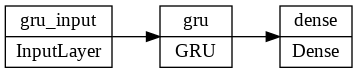

In [ ]:
tf.keras.utils.plot_model(
    model=model_gru, to_file="gru_model.png", show_shapes=False, rankdir="LR")

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 50s 24ms/step - loss: 2.1295 - mean_squared_error: 2.1295
Epoch 2/100
1931/1931 [==============================] - 40s 21ms/step - loss: 1.9721 - mean_squared_error: 1.9721
Epoch 3/100
1931/1931 [==============================] - 41s 21ms/step - loss: 1.8340 - mean_squared_error: 1.8340
Epoch 4/100
1931/1931 [==============================] - 40s 20ms/step - loss: 1.6966 - mean_squared_error: 1.6966
Epoch 5/100
1931/1931 [==============================] - 42s 22ms/step - loss: 1.5946 - mean_squared_error: 1.5946
Epoch 6/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1.5147 - mean_squared_error: 1.5147
Epoch 7/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1.4330 - mean_squared_error: 1.4330
Epoch 8/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1.3505 - mean_squared_error: 1.3505
Epoch 9/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1

In [ ]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 4s 7ms/step - loss: 0.5900 - mean_squared_error: 0.5900
MSE =  [0.5900304913520813, 0.5900304913520813]


##2. GRU1,Dense1,RMSprop

In [80]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'r2_score'])
model_gru.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [57]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

hist_mice = model_gru.fit(X_train_t, y_train, epochs=100, 
                     batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 43s 21ms/step - loss: 2.1347
Epoch 2/100
1931/1931 [==============================] - 40s 21ms/step - loss: 1.9488
Epoch 3/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1.8499
Epoch 4/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1.7237
Epoch 5/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1.6066
Epoch 6/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1.5035
Epoch 7/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1.3920
Epoch 8/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1.2843
Epoch 9/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1.1779
Epoch 10/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1.0826
Epoch 11/100
1931/1931 [==============================] - 39s 20ms/step - loss: 1.0069
Epoch 12/100
1931/1931 [============================

In [58]:
# evaluate : accuracy와 loss 알 수 있음
score = model_gru.evaluate(X_test_t, y_test, batch_size=32)
print('MSE = ', score)

483/483 [==============================] - 4s 7ms/step - loss: 0.6119
MSE =  0.6118541955947876


##3. LSTM1,Dense1,adam

In [49]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(128, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
# model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


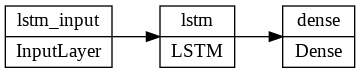

In [50]:
tf.keras.utils.plot_model(
    model=model_lstm, to_file="lstm_model.png", show_shapes=False, rankdir="LR")

In [51]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_lstm.fit(X_train_t, y_train, epochs=100,
          batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 55s 28ms/step - loss: 2.1506 - mean_squared_error: 2.1506
Epoch 2/100
1931/1931 [==============================] - 53s 28ms/step - loss: 1.9683 - mean_squared_error: 1.9683
Epoch 3/100
1931/1931 [==============================] - 59s 31ms/step - loss: 1.8842 - mean_squared_error: 1.8842
Epoch 4/100
1931/1931 [==============================] - 57s 30ms/step - loss: 1.7930 - mean_squared_error: 1.7930
Epoch 5/100
1931/1931 [==============================] - 45s 24ms/step - loss: 1.7182 - mean_squared_error: 1.7182
Epoch 6/100
1931/1931 [==============================] - 45s 23ms/step - loss: 1.6145 - mean_squared_error: 1.6145
Epoch 7/100
1931/1931 [==============================] - 44s 23ms/step - loss: 1.5199 - mean_squared_error: 1.5199
Epoch 8/100
1931/1931 [==============================] - 47s 25ms/step - loss: 1.4197 - mean_squared_error: 1.4197
Epoch 9/100
1931/1931 [==============================] - 47s 24ms/step - loss: 1

In [52]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 4s 8ms/step - loss: 0.6232 - mean_squared_error: 0.6232
[0.6232181191444397, 0.6232181191444397]


##3. LSTM1,Dense1,RMSprop

In [53]:
import tensorflow as tf
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model_lstm = Sequential() # Sequeatial Model
model_lstm.add(LSTM(128, input_shape=(30, 1))) # (timestep, feature)
#model.add(Dense(10)) 
model_lstm.add(Dense(1)) # output = 1 
model_lstm.compile(loss='mean_squared_error', optimizer='RMSprop') 
#model_lstm.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               66560     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [54]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_lstm.fit(X_train_t, y_train, epochs=100,
          batch_size=32, verbose=1, callbacks=[early_stop])

Epoch 1/100
1931/1931 [==============================] - 57s 29ms/step - loss: 2.1292
Epoch 2/100
1931/1931 [==============================] - 48s 25ms/step - loss: 1.9747
Epoch 3/100
1931/1931 [==============================] - 53s 27ms/step - loss: 1.8944
Epoch 4/100
1931/1931 [==============================] - 54s 28ms/step - loss: 1.8006
Epoch 5/100
1931/1931 [==============================] - 46s 24ms/step - loss: 1.6852
Epoch 6/100
1931/1931 [==============================] - 46s 24ms/step - loss: 1.5747
Epoch 7/100
1931/1931 [==============================] - 47s 24ms/step - loss: 1.4737
Epoch 8/100
1931/1931 [==============================] - 46s 24ms/step - loss: 1.3895
Epoch 9/100
1931/1931 [==============================] - 47s 24ms/step - loss: 1.3098
Epoch 10/100
1931/1931 [==============================] - 46s 24ms/step - loss: 1.2397
Epoch 11/100
1931/1931 [==============================] - 46s 24ms/step - loss: 1.1694
Epoch 12/100
1931/1931 [============================

In [55]:
score = model_lstm.evaluate(X_test_t, y_test, batch_size=32)
print(score)

483/483 [==============================] - 5s 9ms/step - loss: 0.6094
0.6094238758087158


##4. AdaBoostGRU,Dense1

In [64]:
!pip install scikeras

In [81]:
import tensorflow as tf
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping
from keras.layers.recurrent_v2 import GRU

#from keras.wrappers.scikit_learn import KerasRegressor
from scikeras.wrappers import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(30, 1)))
model_gru.add(Dense(1)) # output = 1 
#model_gru.compile(loss='mean_squared_error', optimizer='RMSprop')
model_gru.compile(loss='mean_squared_error', optimizer='adam', metrics='mean_squared_error') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [83]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=100, batch_size=32)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=5, random_state=42)

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_adaboostgru.fit(X_train_t, y_train)

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


Epoch 1/100
1931/1931 [==============================] - 48s 23ms/step - loss: 2.0968 - mean_squared_error: 2.0968
Epoch 2/100
1931/1931 [==============================] - 42s 22ms/step - loss: 1.9325 - mean_squared_error: 1.9325
Epoch 3/100
1931/1931 [==============================] - 42s 22ms/step - loss: 1.8503 - mean_squared_error: 1.8503
Epoch 4/100
1931/1931 [==============================] - 41s 21ms/step - loss: 1.7106 - mean_squared_error: 1.7106
Epoch 5/100
1931/1931 [==============================] - 41s 21ms/step - loss: 1.5223 - mean_squared_error: 1.5223
Epoch 6/100
1931/1931 [==============================] - 41s 21ms/step - loss: 1.3993 - mean_squared_error: 1.3993
Epoch 7/100
1931/1931 [==============================] - 41s 21ms/step - loss: 1.2703 - mean_squared_error: 1.2703
Epoch 8/100
1931/1931 [==============================] - 40s 21ms/step - loss: 1.1720 - mean_squared_error: 1.1720
Epoch 9/100
1931/1931 [==============================] - 40s 21ms/step - loss: 1

/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py:290: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  "``build_fn`` will be renamed to ``model`` in a future release,"


1931/1931 [==============================] - 41s 21ms/step - loss: 0.6748 - mean_squared_error: 0.6748
Epoch 2/100
1931/1931 [==============================] - 41s 21ms/step - loss: 0.5667 - mean_squared_error: 0.5667
Epoch 3/100
1931/1931 [==============================] - 40s 21ms/step - loss: 0.5326 - mean_squared_error: 0.5326
Epoch 4/100
1931/1931 [==============================] - 41s 21ms/step - loss: 0.5095 - mean_squared_error: 0.5095
Epoch 5/100
1931/1931 [==============================] - 40s 21ms/step - loss: 0.4912 - mean_squared_error: 0.4912
Epoch 6/100
1931/1931 [==============================] - 40s 21ms/step - loss: 0.4746 - mean_squared_error: 0.4746
Epoch 7/100
1931/1931 [==============================] - 41s 21ms/step - loss: 0.4579 - mean_squared_error: 0.4579
Epoch 8/100
1931/1931 [==============================] - 41s 21ms/step - loss: 0.4591 - mean_squared_error: 0.4591
Epoch 9/100
1931/1931 [==============================] - 41s 21ms/step - loss: 0.4377 - mean

In [ ]:
score = model_adaboostgru.score(X_test_t, y_test, batch_size=32)
print(score)

##Result-Loss

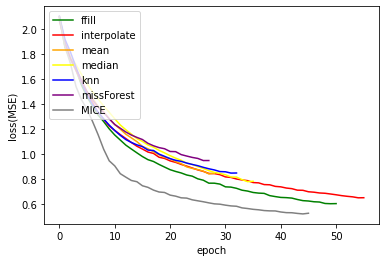

In [ ]:
figs, loss_ax = plt.subplots()
loss_ax.plot(hist_ffill.history['loss'],'y',label='ffill', color='green')
loss_ax.plot(hist_interpolate.history['loss'],'y',label='interpolate', color='red')
loss_ax.plot(hist_mean.history['loss'],'y',label='mean', color='orange')
loss_ax.plot(hist_median.history['loss'],'y',label='median', color='yellow')
loss_ax.plot(hist_knn.history['loss'],'y',label='knn', color='blue')
loss_ax.plot(hist_missForest.history['loss'],'y',label='missForest', color='purple')
loss_ax.plot(hist_mice.history['loss'],'y',label='MICE', color='gray')

loss_ax.legend(loc='upper left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss(MSE)')


plt.show()

Adaboost-GRU 적용

In [ ]:
from keras.layers.recurrent_v2 import GRU
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.ensemble import AdaBoostRegressor
K.clear_session()
    
model_gru = Sequential() # Sequeatial Model 
model_gru.add(GRU(units=128,input_shape=(11, 1)))
model_gru.add(Dense(1)) # output = 1 
model_gru.compile(loss='mean_squared_error', optimizer='adam') 
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50304     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 50,433
Trainable params: 50,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#kerasRegressor로 분류기 만든 뒤, AdaBoostRegressor로 최종 결합
GRU_Predictors = KerasRegressor(build_fn=lambda:model_gru, epochs=20, batch_size=30)
model_adaboostgru = AdaBoostRegressor(GRU_Predictors, n_estimators=5, random_state=42)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [ ]:
tf.keras.utils.plot_model(
    model=model_adaboostgru, to_file="adaboostgru_model.png", show_shapes=False, rankdir="LR")

AttributeError: ignored

In [ ]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

model_adaboostgru.fit(X_train_t, y_train)

Epoch 1/20
163/163 [==============================] - 8s 17ms/step - loss: 2.4938
Epoch 2/20
163/163 [==============================] - 2s 11ms/step - loss: 2.2141
Epoch 3/20
163/163 [==============================] - 2s 11ms/step - loss: 2.0998
Epoch 4/20
163/163 [==============================] - 2s 12ms/step - loss: 1.9472
Epoch 5/20
163/163 [==============================] - 2s 11ms/step - loss: 1.8790
Epoch 6/20
163/163 [==============================] - 2s 11ms/step - loss: 1.8372
Epoch 7/20
163/163 [==============================] - 2s 11ms/step - loss: 1.8269
Epoch 8/20
163/163 [==============================] - 2s 12ms/step - loss: 1.8008
Epoch 9/20
163/163 [==============================] - 2s 11ms/step - loss: 1.6986
Epoch 10/20
163/163 [==============================] - 2s 12ms/step - loss: 1.6416
Epoch 11/20
163/163 [==============================] - 2s 12ms/step - loss: 1.5445
Epoch 12/20
163/163 [==============================] - 2s 11ms/step - loss: 1.4268
Epoch 13/20
1

AdaBoostRegressor(base_estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fb175d03550>,
                  n_estimators=5, random_state=42)

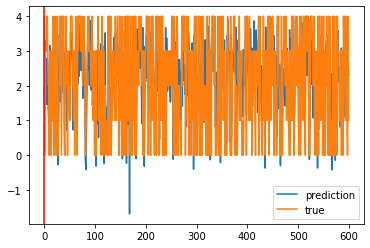

In [ ]:
preds = model.predict(X_test_t)

plt.plot(preds[:600], label='prediction')
plt.plot(y_test[:600], label='true')
plt.axvline(x=len(y_test)-len(preds), color='r')
plt.legend()
plt.show()

Define a DNN model

In [ ]:
import os

import tensorflow as tf
import datetime

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow import feature_column as fc



In [ ]:
df_fc = df_raw_data
df_fc.head()

,station_name,holiday,day_week,weekend,temperature,humid,precipitation,precipitation_type,year,month,day,hour,minute,total_car_num
0,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,20,2
1,26,0,3,0,23.0,52.0,0.0,0.0,2020,9,17,21,38,3
2,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,45,4
3,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,50,4
4,26,0,4,0,25.3,38.0,0.0,0.0,2020,9,18,16,55,4


In [ ]:
df_fc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6108 entries, 0 to 6116
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   station_name        6108 non-null   int64  
 1   holiday             6108 non-null   int64  
 2   day_week            6108 non-null   int64  
 3   weekend             6108 non-null   int64  
 4   temperature         6108 non-null   float64
 5   humid               6108 non-null   float64
 6   precipitation       6108 non-null   float64
 7   precipitation_type  6108 non-null   float64
 8   year                6108 non-null   int64  
 9   month               6108 non-null   int64  
 10  day                 6108 non-null   int64  
 11  hour                6108 non-null   int64  
 12  minute              6108 non-null   int64  
 13  total_car_num       6108 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 715.8 KB


In [ ]:
train, test = train_test_split(df_fc, test_size=0.2)
train, val = train_test_split(train, test_size=0.2)
print(len(train), '훈련 샘플')
print(len(val), '검증 샘플')
print(len(test), '테스트 샘플')

3908 훈련 샘플
978 검증 샘플
1222 테스트 샘플


In [ ]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('total_car_num')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size = len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
batch_size = 10
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [ ]:
train_ds

<BatchDataset shapes: ({station_name: (None,), holiday: (None,), day_week: (None,), weekend: (None,), temperature: (None,), humid: (None,), precipitation: (None,), precipitation_type: (None,), year: (None,), month: (None,), day: (None,), hour: (None,), minute: (None,)}, (None,)), types: ({station_name: tf.int64, holiday: tf.int64, day_week: tf.int64, weekend: tf.int64, temperature: tf.float64, humid: tf.float64, precipitation: tf.float64, precipitation_type: tf.float64, year: tf.int64, month: tf.int64, day: tf.int64, hour: tf.int64, minute: tf.int64}, tf.int64)>

In [ ]:
for feature_batch, label_batch in train_ds.take(1):
  print("Total feature: ", list(feature_batch.keys()))
  print("Target feature: ", label_batch)

Total feature:  ['station_name', 'holiday', 'day_week', 'weekend', 'temperature', 'humid', 'precipitation', 'precipitation_type', 'year', 'month', 'day', 'hour', 'minute']
Target feature:  tf.Tensor([0 4 4 0 3 2 0 4 0 3], shape=(10,), dtype=int64)


In [ ]:
example_batch = next(iter(train_ds))[0]
feature_batch

{'day': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 9, 29,  6,  9,  6, 13,  1, 21,  9, 22])>,
 'day_week': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([2, 1, 1, 2, 1, 6, 3, 0, 2, 1])>,
 'holiday': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])>,
 'hour': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([15, 23, 21, 16, 13, 21,  9, 15, 14, 16])>,
 'humid': <tf.Tensor: shape=(10,), dtype=float64, numpy=array([66., 57., 36., 66., 64., 59., 78., 47., 76., 41.])>,
 'minute': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 9, 10, 40, 45, 10, 30,  0, 20, 14, 35])>,
 'month': <tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 9,  9, 10,  9, 10,  9, 10,  9,  9,  9])>,
 'precipitation': <tf.Tensor: shape=(10,), dtype=float64, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>,
 'precipitation_type': <tf.Tensor: shape=(10,), dtype=float64, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])>,
 'station_name': <tf.Tensor: shape=(10,), dt

In [ ]:
# 특성 열을 만들고 배치 데이터를 변환하는 함수
def demo(feature_column):
  feature_layer = layers.DenseFeatures(feature_column)
  print(feature_layer(feature_batch).numpy())

In [ ]:
crossed_feature = fc.crossed_column(['day_week', 'hour'], hash_bucket_size=170)
demo(fc.indicator_column(crossed_feature))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
feature_columns = []

for colname in ["station_name", "holiday", "day_week", "weekend", "temperature", "humid", "precipitation", "precipitation_type", "year", "month", "day", "hour", "minute"]:
  feature_columns.append(fc.numeric_column(colname))

crossed_feature  = fc.crossed_column(['day_week', 'hour'], hash_bucket_size=170)
crossed_feature  = fc.indicator_column(crossed_feature)
feature_columns.append(crossed_feature)

In [ ]:
feature_layer = tf.keras.layers.DenseFeatures(feature_columns)

In [ ]:
batch_size = 32
train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)